In [176]:
# 복습!
# 함수란?
# 함수를 왜 쓰는가?
# 클래스란?
# 클래스 변수 앞에 self.name처럼 self를 붙이면 어떤 특징이 생기는가?

In [177]:
# 1. 패키지 import
import pandas as pd
import seaborn as sns

In [178]:
# 1.1. yfinance 설치
# yfinance는 야후 파이낸스 오픈소스 도구입니다.
# 시장 종목의 가격을 다운로드받을 수 있습니다.

!pip3 install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[*********************100%***********************]  1 of 1 completed


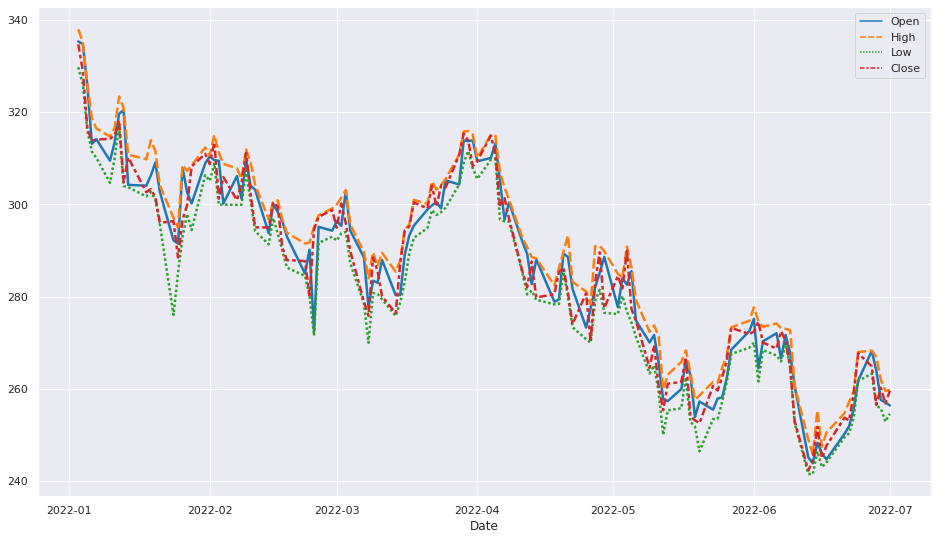

In [179]:
# 구글 GOOG
# 마이크로소프트 MSFT
# 스타벅스 SBUX
# 테슬라 TSLA

X축 = yf.download("MSFT", start="2022-01-01", end="2022-07-05")
Y축 = pd.date_range("1 1 2022", periods=365, freq="D")

data = pd.DataFrame(X축, columns=["Open", "High", "Low", "Close"])

sns.set(rc={'figure.figsize':(16,9)})
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [180]:
# 2. 데이터 기본 설정

# 2.1. 데이터를 읽어옵니다.

df = pd.read_excel("성적.xlsx")
df

,번호,국어,수학,영어
0,1,53,63,64
1,2,97,66,50
2,3,54,53,80
3,4,86,93,57
4,5,75,100,50
5,6,59,51,55
6,7,68,82,68
7,8,77,52,78
8,9,97,66,90
9,10,94,78,50


In [181]:
# 2.2. 불러온 다음에는 인덱스를 설정해야 합니다.
# 준비 끝!

df = df.set_index("번호", drop=True)
df

,국어,수학,영어
번호,,,
1,53,63,64
2,97,66,50
3,54,53,80
4,86,93,57
5,75,100,50
6,59,51,55
7,68,82,68
8,77,52,78
9,97,66,90


In [182]:
# 3. 열(column) 다루기

# 3.1. 대괄호 안에 열 제목을 넣어 데이터의 특정 열에 접근할 수 있습니다.
# df["국어"], df["수학"] 이렇게 가능.

df["국어"]

번호
1     53
2     97
3     54
4     86
5     75
6     59
7     68
8     77
9     97
10    94
Name: 국어, dtype: int64

In [183]:
# 3.2. 기존에 없던 열을 추가할 수 있습니다.
df["합계"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df

,국어,수학,영어,합계
번호,,,,
1,53,63,64,1
2,97,66,50,2
3,54,53,80,3
4,86,93,57,4
5,75,100,50,5
6,59,51,55,6
7,68,82,68,7
8,77,52,78,8
9,97,66,90,9


In [184]:
# 3.3. 다른 열과 연산을 하고 싶을 때도 같은 형태로 접근할 수 있습니다.

df["합계"] = df["국어"] + df["수학"] + df["영어"]
df["합계2"] = df[["국어", "수학", "영어"]].sum(axis=1)
df

,국어,수학,영어,합계,합계2
번호,,,,,
1,53,63,64,180,180
2,97,66,50,213,213
3,54,53,80,187,187
4,86,93,57,236,236
5,75,100,50,225,225
6,59,51,55,165,165
7,68,82,68,218,218
8,77,52,78,207,207
9,97,66,90,253,253


In [185]:
# 3.4. 평균, 등수 역시 추가할 수 있습니다.

df["평균"] = df["합계"] / 3
df["평균2"] = df[["국어", "수학", "영어"]].mean(axis=1)

df["등수"] = df["합계"].rank(ascending=False)

df

,국어,수학,영어,합계,합계2,평균,평균2,등수
번호,,,,,,,,
1,53,63,64,180,180,60.00,60.00,9.00
2,97,66,50,213,213,71.00,71.00,6.00
3,54,53,80,187,187,62.33,62.33,8.00
4,86,93,57,236,236,78.67,78.67,2.00
5,75,100,50,225,225,75.00,75.00,3.00
6,59,51,55,165,165,55.00,55.00,10.00
7,68,82,68,218,218,72.67,72.67,5.00
8,77,52,78,207,207,69.00,69.00,7.00
9,97,66,90,253,253,84.33,84.33,1.00


In [186]:
# 4. 행(row) 다루기
# 행은 열과 다르게, .loc이라는 속성을 통해 접근할 수 있습니다.

df.loc[1]

국어     53.00
수학     63.00
영어     64.00
합계    180.00
합계2   180.00
평균     60.00
평균2    60.00
등수      9.00
Name: 1, dtype: float64

In [187]:
# 4.1. .loc 속성을 통해 추가가 가능하고, 다른 속성과 함께 연산도 가능합니다.

df.loc[11] = [1, 2, 3, 4, 5, 6, 7, 8]

df

,국어,수학,영어,합계,합계2,평균,평균2,등수
번호,,,,,,,,
1,53,63,64,180,180,60.00,60.00,9.00
2,97,66,50,213,213,71.00,71.00,6.00
3,54,53,80,187,187,62.33,62.33,8.00
4,86,93,57,236,236,78.67,78.67,2.00
5,75,100,50,225,225,75.00,75.00,3.00
6,59,51,55,165,165,55.00,55.00,10.00
7,68,82,68,218,218,72.67,72.67,5.00
8,77,52,78,207,207,69.00,69.00,7.00
9,97,66,90,253,253,84.33,84.33,1.00


In [188]:
# 5. 열 제거하기

df = df.drop(["합계2"], axis=1)
df = df.drop(["평균2"], axis=1)

df

,국어,수학,영어,합계,평균,등수
번호,,,,,,
1,53,63,64,180,60.00,9.00
2,97,66,50,213,71.00,6.00
3,54,53,80,187,62.33,8.00
4,86,93,57,236,78.67,2.00
5,75,100,50,225,75.00,3.00
6,59,51,55,165,55.00,10.00
7,68,82,68,218,72.67,5.00
8,77,52,78,207,69.00,7.00
9,97,66,90,253,84.33,1.00


In [192]:
# 6. 표 설정

df["등수"] = df["등수"].astype(int) # 등수는 정수이기 때문에 정수형 자료로 변경합니다.

pd.options.display.float_format = '{:.2f}'.format # 소수점 둘째자리까지만 표현합니다.

df

,국어,수학,영어,합계,평균,등수
번호,,,,,,
1,53,63,64,180,60.00,9
2,97,66,50,213,71.00,6
3,54,53,80,187,62.33,8
4,86,93,57,236,78.67,2
5,75,100,50,225,75.00,3
6,59,51,55,165,55.00,10
7,68,82,68,218,72.67,5
8,77,52,78,207,69.00,7
9,97,66,90,253,84.33,1


In [193]:
# 6. 저장

df.to_excel('결과물.xlsx', index=True)